In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline

### read and summarize data

In [3]:
f = '/Users/leekuczewski/Desktop/The_New_School/Repos/VisualizeData_MachineLearning/visualizedata-ml/toxiccomments_train.csv'
toxic_data = pd.read_csv(f)

In [4]:
print("toxic_data is:", type(toxic_data))
print("toxic_data has", toxic_data.shape[0], "rows and", toxic_data.shape[1], "columns", "\n")
print("the data types for each of the columns in toxic_data:")
print(toxic_data.dtypes, "\n")
print("the first 10 rows in toxic_data:")
print(toxic_data.head(5))

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 159571 rows and 8 columns 

the data types for each of the columns in toxic_data:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1     

In [5]:
print("The rate of toxic comments in the dataset: ")
print(toxic_data['toxic'].mean())

The rate of toxic comments in the dataset: 
0.09584448302009764


### Feature extraction on natural language data

In [12]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = toxic_data.comment_text.values
# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
# vectorize Bag of Words from review text; as sparse matrix
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=True)
X_hv = hv.fit_transform(toxic_data.comment_text)
print(X_hv.shape)

(159571, 131072)


In [26]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X_hv)

In [27]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### Create additional quantitative features

In [28]:
# features from Amazon.csv to add to feature set
toxic_data['word_count'] = toxic_data['comment_text'].str.split(' ').str.len()
toxic_data['punc_count'] = toxic_data['comment_text'].str.count("\.")


X_quant_features = toxic_data[["word_count", "punc_count"]]
print(X_quant_features.head(50))
print(type(X_quant_features))

   word_count  punc_count
0          42           5
1          18           2
2          42           3
3         112           3
4          13           1
5          12           1
6           8           0
7          21           2
8          83           7
9          12           0
<class 'pandas.core.frame.DataFrame'>


### Combine all quantitative features into a single sparse matrix

In [17]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(159571, 131074)


In [29]:
# look at an example of a "row" of a sparse matrix
print(X_matrix[1234])

  (0, 13080)	-0.3352837541940735
  (0, 20637)	0.12273750000524668
  (0, 24734)	-0.05756850399552078
  (0, 28641)	0.30255698578348783
  (0, 36157)	-0.11300117557573076
  (0, 38365)	-0.2858310107057536
  (0, 43099)	0.06265026668613759
  (0, 43902)	-0.17992345892724868
  (0, 45980)	0.1435960247305051
  (0, 46353)	0.13568699421838595
  (0, 49453)	-0.1384992605089221
  (0, 50743)	-0.089351164688054
  (0, 51619)	0.11280487492095764
  (0, 54542)	-0.2221009321228698
  (0, 61069)	-0.41065661467663855
  (0, 65396)	-0.4538351025565183
  (0, 67646)	0.07583345070821097
  (0, 69740)	-0.11164777968958645
  (0, 92259)	0.2072488754885471
  (0, 98369)	0.1522711489306622
  (0, 111869)	0.21053732125232136
  (0, 116871)	-0.12394931615623446
  (0, 131072)	27.0


### Create `X`, scaled matrix of features

In [30]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X = sc.fit_transform(X_matrix)
print(X.shape)

(159571, 131074)


In [13]:
# look at an example of a "row" of a sparse matrix, after scaling
print(X[1234])

  (0, 13080)	38.95725464549216
  (0, 20637)	3.349436911185673
  (0, 24734)	0.8062975449122693
  (0, 28641)	31.749699089684647
  (0, 36157)	2.5467270635628396
  (0, 38365)	25.739199844475827
  (0, 43099)	1.1063300679196704
  (0, 43902)	4.567256101377231
  (0, 45980)	2.023775982828097
  (0, 46353)	4.339988839263545
  (0, 49453)	2.861090888355053
  (0, 50743)	2.211898499002182
  (0, 51619)	2.682705565838809
  (0, 54542)	14.869388917697037
  (0, 61069)	156.62278459891698
  (0, 65396)	217.8938069236664
  (0, 67646)	1.466925670797892
  (0, 69740)	3.340770670659583
  (0, 92259)	11.136250466652653
  (0, 98369)	4.93282853017257
  (0, 111869)	14.510798190159978
  (0, 116871)	3.916806331416094
  (0, 131072)	0.2686035598369133


# Create Training and Test Sets

In [31]:
# IMPORTANT, enter an integer into the variable below; any integer other than 74
my_random_state = 337

# create training and test sets
from sklearn.model_selection import train_test_split

# enter an integer for the random_state parameter; any integer will work
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, toxic_data['toxic'], toxic_data, test_size= 0.2, random_state=my_random_state)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_raw_train.shape)
print(X_raw_test.shape)

(127656, 131074)
(31915, 131074)
(127656,)
(31915,)
(127656, 10)
(31915, 10)


# Fit Models

### MODEL: ordinary least squares

In [32]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 12209.0, 'Neg': 140968.0, 'TP': 4763, 'TN': 47313, 'FP': 45072, 'FN': 4987, 'Accuracy': 0.3399727113078334, 'Precision': 0.0955753988160931, 'Recall': 0.3901220411172086, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [33]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 12209.0, 'Neg': 140968.0, 'TP': 982, 'TN': 83553, 'FP': 8832, 'FN': 8768, 'Accuracy': 0.5518778928951474, 'Precision': 0.10006113715100877, 'Recall': 0.0804324678515849, 'desc': 'svm_train'}


### MODEL: logistic regression

In [35]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log', max_iter=200, alpha=0.00001)
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 12209.0, 'Neg': 140968.0, 'TP': 978, 'TN': 83576, 'FP': 8809, 'FN': 8772, 'Accuracy': 0.5520019324049955, 'Precision': 0.09992847655052621, 'Recall': 0.08010484069129331, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

ValueError: Input X must be non-negative

### MODEL: Perceptron

In [38]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 12209.0, 'Neg': 140968.0, 'TP': 973, 'TN': 83561, 'FP': 8824, 'FN': 8777, 'Accuracy': 0.5518713644998923, 'Precision': 0.09931611717872818, 'Recall': 0.07969530674092883, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [40]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=0.1)
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 12209.0, 'Neg': 140968.0, 'TP': 831, 'TN': 84965, 'FP': 7420, 'FN': 8919, 'Accuracy': 0.5601101993119071, 'Precision': 0.10071506484062538, 'Recall': 0.06806454255057744, 'desc': 'rdg_train'}


### What is the distribution of weights, OLS vs. ridge? 

In [46]:
print(rdg)

RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)


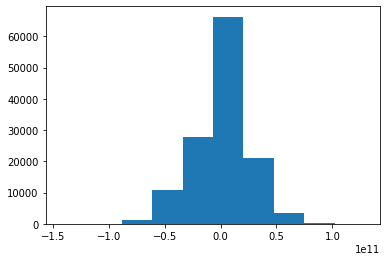

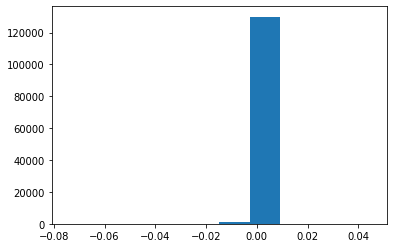

In [47]:
plt.hist(ols.coef_[0])
plt.show()

plt.hist(rdg.coef_[0])
plt.show()

### ROC plot to compare performance of various models and fits

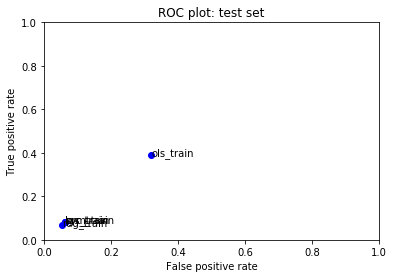

In [50]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, prc_performance_train, rdg_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Took out nbs_performance_train, from fits

## a digression: looking inside the `rdg` object

[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

In [51]:
dir(rdg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_label_binarizer',
 '_more_tags',
 '_predict_proba_lr',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'class_weight',
 'classes_',
 'coef_',
 'copy_X',
 'decision_function',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [52]:
rdg.get_params()

{'alpha': 0.1,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [53]:
type(rdg.coef_)

numpy.ndarray

In [54]:
rdg.coef_.shape

(1, 131074)

In [55]:
print(rdg.coef_[0])

[-0.0001609  -0.00027498  0.         ... -0.00019152  0.01380968
  0.00802881]


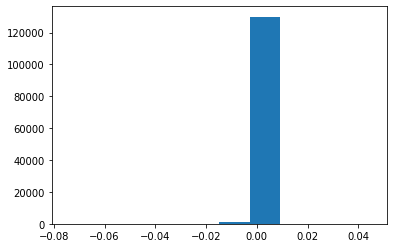

In [57]:
plt.hist(rdg.coef_[0])
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [58]:
toxic_data.loc[0, "comment_text"]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [59]:
ridge_predictions = rdg.predict(X_train)

In [60]:
ridge_predictions.shape

(127656,)

In [61]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ridge_predictions)):
    if (ridge_predictions[i] == True):
        if (toxic_data.loc[i, "toxic"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(toxic_data.loc[i, "comment_text"])
                print('* * * * * * * * * ')

Examples of false positives:
304
I've tried to be as objective as possible, and treat the author in my head as someone who's first tongue is not English.  I think Davies is borderline notable, but the article is not.  I spent an hour googling Davies earlier today and found nothing except that he has translated a lot of stuff.  Well, I have done a lot of stuff in my life.  I'm even borderline notable in a small field, but nothing to warrant an article on me, especially one that precisley nothing links to like this one.  Frankly I hope the author just makes it notable.  I'll respond to him with gentlemanly politesse, but I can;t help him any further.
* * * * * * * * * 
618
Warning. Earth, I'd like to leave you access to your talk page so that in perhaps six months you can convince us that we should try again - if you're so inclined. But you're making it hard. If you continue these abusive comments, I will revoke your talk page access.
* * * * * * * * * 
1267
"
Cheers, I wondered if you w

"
After your first message I put this on the talk page, but you maybe didn't have time to read it before the article was deleted:
If you want detail about why it is historically nonsense: York and Lancaster were branches of the house of Plantagenet, competing with each other but not with some independent ""Plantagenet"" faction. The house of Tudor was descended (maternally) from a branch of the Lancasters, who did not survive the wars. The first Tudor King, Henry VII, came to the throne by winning the Battle of Bosworth in 1485, which was Tudor vs. York. The next year he married Elizabeth of York which helped legitimise his claim to the throne; but any tensions in the next few years were Tudor vs. York, not Tudor and York vs. ""Plantagenet assemblies.""
Research: I read the articles Plantagenet, Tudor dynasty, Battle of Bosworth, Henry VII of England, Elizabeth of York, checked the links  and a few on-line sources about Norton Canes, and off-line checked A.R.Myers, England in the Late 

117203
"

Ryan Postlethwaite looks forward to Nicks' return."
* * * * * * * * * 
117358
+++++++++++++++++++++++++++++++++++++++++++++++++

They are not married - he already had a wife when he met Roma and they live in Killiney
* * * * * * * * * 
117743
MAYBE 

Maybe you could inform others to not spread libel as a corollary of WP:POINT, because people like you who let them get away with it is even more infuriating than them doing it under criticism and insults.  But, go on and tell people how they ought to be doing things.  Don't be righteous, just revel in double standards.
* * * * * * * * * 
118707
Synthethic a priori?

Differentiations such as synthetic a priori have long been dismissed by wittgenstein. Not even Mises clearly uses that definition to the contents of praxeology (sometimes referring to it as analytical, or whatever), since he mostly dismissed the question as irrevelant. So, what i mean is, i don't think it's proper to state praxeology as synthetic a priori. For a bette

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [34]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 3048.0, 'Neg': 54413.0, 'TP': 305, 'TN': 2882, 'FP': 2857, 'FN': 325, 'Accuracy': 0.05546370581785907, 'Precision': 0.09645793801391524, 'Recall': 0.10006561679790026, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [35]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 3048.0, 'Neg': 54413.0, 'TP': 73, 'TN': 5057, 'FP': 682, 'FN': 557, 'Accuracy': 0.08927794504098432, 'Precision': 0.09668874172185431, 'Recall': 0.023950131233595802, 'desc': 'svm_test'}


### MODEL: logistic regression

In [36]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 3048.0, 'Neg': 54413.0, 'TP': 78, 'TN': 5076, 'FP': 663, 'FN': 552, 'Accuracy': 0.08969561963766728, 'Precision': 0.10526315789473684, 'Recall': 0.025590551181102362, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [37]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 3048.0, 'Neg': 54413.0, 'TP': 136, 'TN': 4434, 'FP': 1305, 'FN': 494, 'Accuracy': 0.07953220445171508, 'Precision': 0.09437890353920889, 'Recall': 0.04461942257217848, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [38]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 3048.0, 'Neg': 54413.0, 'TP': 79, 'TN': 5086, 'FP': 653, 'FN': 551, 'Accuracy': 0.08988705382781365, 'Precision': 0.10792349726775956, 'Recall': 0.025918635170603676, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [39]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 3048.0, 'Neg': 54413.0, 'TP': 39, 'TN': 5382, 'FP': 357, 'FN': 591, 'Accuracy': 0.0943422495257653, 'Precision': 0.09848484848484848, 'Recall': 0.012795275590551181, 'desc': 'rdg_test'}


### ROC plot to compare performance of various models and fits

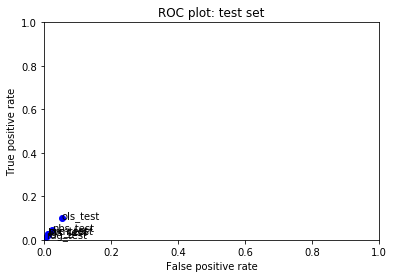

In [40]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()